In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def post_process(img, outputs, conf):
    H, W = img.shape[:2]

    boxes = []
    confidences = []
    classIDs = []

    for output in outputs:
        scores = output[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > conf:
            x, y, w, h = output[:4] * np.array([W, H, W, H])
            p0 = int(x - w//2), int(y - h//2)
            p1 = int(x + w//2), int(y + h//2)
            boxes.append([*p0, int(w), int(h)])
            confidences.append(float(confidence))
            classIDs.append(classID)
            # cv.rectangle(img, p0, p1, WHITE, 1)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf, conf-0.1)
    if len(indices) > 0:
        for i in indices.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            color = [int(c) for c in colors[classIDs[i]]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
            cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)


In [53]:
classes = open('coco.names').read().strip().split('\n')
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

In [54]:
img_with = img_height = 416

In [55]:
net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)

In [56]:
path = r'C:\yolo\datasets\FLIR_ADAS_1_3\train\Annotated_thermal_8_bit\FLIR_00001.jpeg'

In [57]:
image = cv2.imread(path)

In [58]:
blob = cv2.dnn.blobFromImage(image, 1/255, (img_with,img_height),(8,8,8),1,crop=False)

In [59]:
net.setInput(blob)

In [60]:
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

In [61]:
outputs = net.forward(ln)

In [62]:
outputs = np.vstack(outputs)

In [63]:
post_process(image, outputs, 0.5)

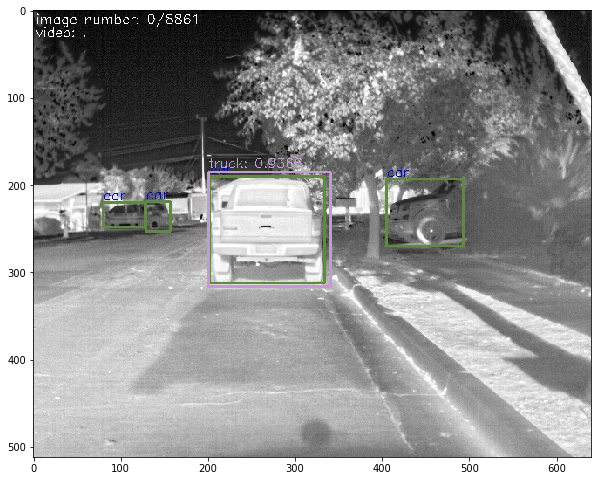

In [64]:
plt.figure(figsize=(10,10))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)